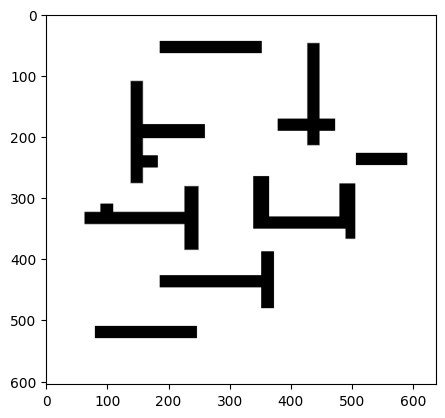

In [1]:
import matplotlib.pyplot as plt
from eval_metrics import cal_bend, cal_path_length
plt.imshow(plt.imread("./generated_images/u_shape.png"))

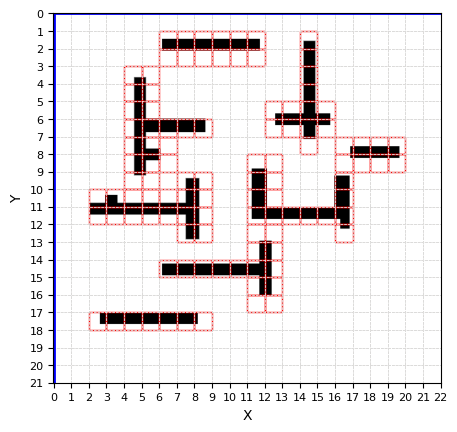

In [2]:
# Import necessary custom-built classes and methods
# from utils.obstacle_space import Map
from obstacle.obstacle_map import Map
from a_star.explorer import Explorer
from a_star.search import astar_search, path_states, dynamic_weighted_astar_search
import time

map = Map(image_path="./generated_images/u_shape.png", grid_size=30)
map.draw_coordinate_system()

In [3]:
initial=(0,0)
goal=(map.x_lim - 1, map.y_lim -1)

# Initialize the explorer class
explorer = Explorer(map=map, initial=initial, goal=goal)
# Check validity of start and goal nodes

if map.is_obstacle_in_grid(initial[0], initial[1]):
    print('Start lie in obstacle space!!\nPlease try again')

if map.is_obstacle_in_grid(goal[0], goal[1]):
    print('Goal lie in obstacle space!!\nPlease try again')

Reached: 194
Elapsed Time: 0.028635025024414062 seconds
Bends:  7
Path length:  36.798989873223334


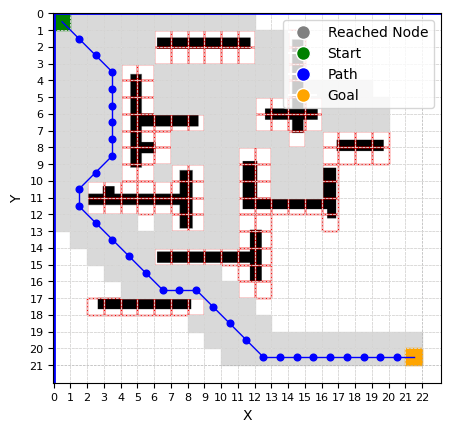

In [4]:
start_time = time.time()
node = astar_search(explorer)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
states = path_states(node)

print(f"Reached: {len(explorer.reached.keys())}")
print(f"Elapsed Time: {elapsed_time} seconds")
print("Bends: ", cal_bend(states))
print("Path length: ", cal_path_length(states))

map.draw_path_found(states, initial, goal, explorer.get_reached())

Reached:  96
Elapsed Time: 0.007529020309448242 seconds
Bends:  7
Path length:  36.798989873223334


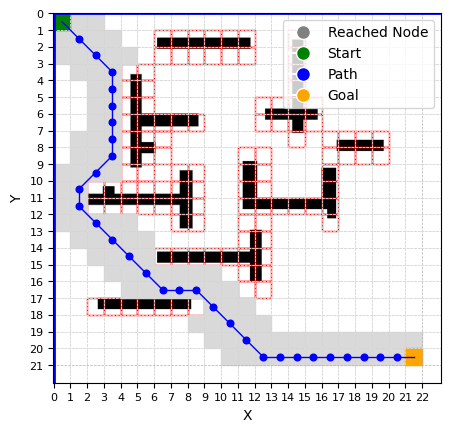

In [5]:
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
path = path_states(node)

print("Reached: ", len(explorer.reached.keys()))
print(f"Elapsed Time: {elapsed_time} seconds")
print("Bends: ", cal_bend(path))
print("Path length: ", cal_path_length(path))


map.draw_path_found(path, initial, goal, explorer.get_reached())

In [6]:
from path_smooth.path_smooth import simplify_path
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
path = path_states(node)
simplified_path = simplify_path(path, map)
end_time = time.time()

print("Reached: ", len(explorer.reached.keys()))
print(f"Elapsed Time: {elapsed_time} seconds")
print("Bends: ", cal_bend(simplified_path))
print("Path length: ", cal_path_length(simplified_path))

Reached:  96
Elapsed Time: 0.007529020309448242 seconds
Bends:  6
Path length:  33.504721333767435


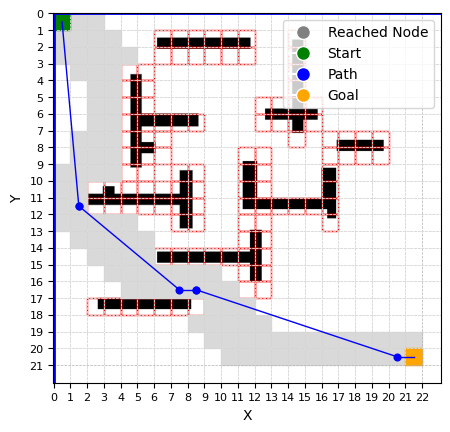

In [7]:
map.draw_path_found(simplified_path, initial, goal, explorer.get_reached())

**Genetic algorithm**

Finish Ant colony optimization, size of initial population:  2154
------------Generation 1 -----------------
Population size:  2154
Before selection, population size:  2154
After selection, population size:  2132
Before crossover, two first parents: 
[0, 23, 46, 68, 45, 24, 47, 48, 25, 26, 27, 6, 7, 8, 9, 10, 11, 34, 35, 14, 37, 60, 61, 84, 107, 128, 151, 174, 196, 219, 240, 263, 284, 307, 328, 351, 372, 394, 417, 438, 460, 439, 461]
[0, 23, 46, 69, 90, 112, 135, 113, 91, 68, 45, 67, 89, 111, 134, 157, 178, 200, 221, 243, 266, 289, 312, 313, 336, 359, 360, 361, 384, 385, 386, 409, 432, 411, 434, 435, 458, 459, 460, 461]
After crossover, two first parents: 
[0, 23, 46, 68, 45, 67, 89, 111, 134, 157, 178, 200, 221, 243, 266, 289, 312, 313, 336, 359, 360, 361, 384, 385, 386, 409, 432, 411, 434, 435, 458, 459, 460, 461]
[0, 23, 46, 69, 90, 112, 135, 113, 91, 68, 45, 24, 47, 48, 25, 26, 27, 6, 7, 8, 9, 10, 11, 34, 35, 14, 37, 60, 61, 84, 107, 128, 151, 174, 196, 219, 240, 263, 284, 307, 328

/Users/haily/Documents/GitHub/mobile_robot_path_planning/genetic/cal_smooth_value.py:12: RuntimeWarning: invalid value encountered in scalar divide
  cosine_theta = dot_product / (norm_BA * norm_BC)


After insertion: [0, 243, 266, 311, 357, 338, 361, 406, 386, 412, 461]
Before deletion: [0, 243, 266, 311, 357, 338, 361, 406, 386, 412, 461]
After deletion: [0, 243, 266, 313, 336, 361, 384, 461]
Mean fit_value:  -3441.6592052360693
Mean path_value:  34.21566168360443
Mean smooth_value:  27.57345971563981
Best path:  [0, 397, 461]
------------Generation 3 -----------------
Population size:  2110
Before selection, population size:  2110
After selection, population size:  2088
Before crossover, two first parents: 
[0, 243, 266, 313, 336, 361, 384, 461]
[0, 243, 266, 313, 336, 361, 384, 461]
After crossover, two first parents: 
[0, 243, 266, 313, 336, 361, 384, 461]
[0, 243, 266, 313, 336, 361, 384, 461]
Before mutation: [0, 243, 266, 313, 336, 361, 384, 461]
After mutation: [0, 243, 266, 313, 336, 361, 406, 461]
Before insertion: [0, 243, 266, 313, 336, 361, 406, 461]
After insertion: [0, 11, 34, 35, 14, 37, 61, 108, 128, 151, 174, 461]
Before deletion: [0, 11, 34, 35, 14, 37, 61, 108, 

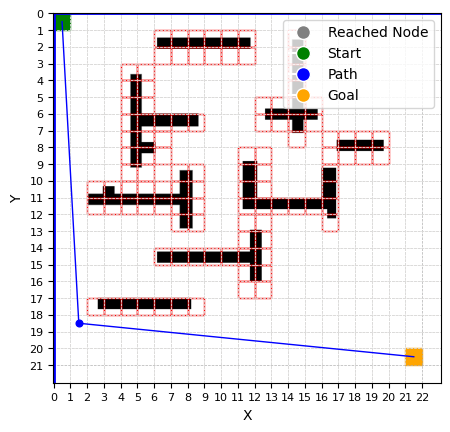

In [8]:
from genetic.genetic import genetic
from genetic.genetic import convert_path_to_xy
G = map.get_grid_matrix()
cols = G.shape[1]
start_time = time.time()
mean_path_value, mean_smooth_value, mean_fit_value, best_path = genetic(map, start=initial, end=goal,
                max_generation=10, ant_number=10, 
                p_crossover=1, p_mutation=0.05, verbose=True)
end_time = time.time()
path = convert_path_to_xy(best_path[-1], cols)

print("Elapsed time: ", end_time-start_time)
print("Bends: ", cal_bend(path))
print("Path length: ", cal_path_length(path))

map.draw_path_found(convert_path_to_xy(best_path[-1], cols), initial, goal, [])